In [281]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
pip install ipython-sql sqlalchemy sqlite3 pandas matplotlib seaborn


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
Note: you may need to restart the kernel to use updated packages.


In [113]:


df = pd.read_csv("/Users/remyfernando/Desktop/data portofolio/SJC_age_exp_ranges.csv")

In [115]:
df

,id,age,gender,ed_level,job_title,exp_in_years,salary,country,race,age_range,exp_range
0,10,29.0,Male,Master's Degree,Software Developer,3.0,75000.0,UK,White,2,1
1,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,4,3
2,47,45.0,Female,Master's Degree,Director of Marketing,16.0,180000.0,UK,White,4,4
3,4249,40.0,Female,Master's Degree,Marketing Coordinator,12.0,122000.0,Australia,White,3,3
4,4263,30.0,Male,Bachelor's Degree,Software Developer,6.0,85000.0,Australia,White,2,2
...,...,...,...,...,...,...,...,...,...,...,...
6693,1099,29.0,Male,Bachelor's Degree,Data Analyst,7.0,130000.0,Australia,White,2,2
6694,1126,26.0,Male,Bachelor's Degree,Data Analyst,3.0,110000.0,Australia,White,2,1
6695,1134,30.0,Male,Bachelor's Degree,Product Manager,8.0,185000.0,Australia,White,2,2
6696,1142,32.0,Female,Bachelor's Degree,Data Scientist,9.0,185000.0,Australia,White,2,2


In [117]:
df.head()

,id,age,gender,ed_level,job_title,exp_in_years,salary,country,race,age_range,exp_range
0,10,29.0,Male,Master's Degree,Software Developer,3.0,75000.0,UK,White,2,1
1,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,4,3
2,47,45.0,Female,Master's Degree,Director of Marketing,16.0,180000.0,UK,White,4,4
3,4249,40.0,Female,Master's Degree,Marketing Coordinator,12.0,122000.0,Australia,White,3,3
4,4263,30.0,Male,Bachelor's Degree,Software Developer,6.0,85000.0,Australia,White,2,2


In [119]:
df.describe()

,id,age,exp_in_years,salary,age_range,exp_range
count,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000
mean,3351.922216,33.623022,8.095178,115329.253061,2.421170,2.080770
std,1934.949414,7.615784,6.060291,52789.792507,0.784812,1.192237
min,0.000000,21.000000,0.000000,350.000000,1.000000,1.000000
25%,1676.250000,28.000000,3.000000,70000.000000,2.000000,1.000000
50%,3352.500000,32.000000,7.000000,115000.000000,2.000000,2.000000
75%,5026.750000,38.000000,12.000000,160000.000000,3.000000,3.000000
max,6703.000000,62.000000,34.000000,250000.000000,5.000000,7.000000


In [121]:
#  There are for salaries below 600 when the 25 quartile is 70,000

df = df.drop(df[df["salary"] < 10000].index)

#deleting them
#Cheking
df[df["salary"] < 10000]

,id,age,gender,ed_level,job_title,exp_in_years,salary,country,race,age_range,exp_range


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6694 entries, 0 to 6697
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6694 non-null   int64  
 1   age           6694 non-null   float64
 2   gender        6694 non-null   object 
 3   ed_level      6694 non-null   object 
 4   job_title     6694 non-null   object 
 5   exp_in_years  6694 non-null   float64
 6   salary        6694 non-null   float64
 7   country       6694 non-null   object 
 8   race          6694 non-null   object 
 9   age_range     6694 non-null   int64  
 10  exp_range     6694 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 627.6+ KB


## Correlation matrix

In [126]:
## Encoding categorical variables

encoded_df = df.copy()

for col in encoded_df.columns:
    if encoded_df[col].dtype == "object":
        encoded_df[col]= encoded_df[col].astype("category")
        encoded_df[col]= encoded_df[col].cat.codes

encoded_df

,id,age,gender,ed_level,job_title,exp_in_years,salary,country,race,age_range,exp_range
0,10,29.0,1,2,174,3.0,75000.0,3,4,2,1
1,2,45.0,1,3,144,15.0,150000.0,1,4,4,3
2,47,45.0,0,2,33,16.0,180000.0,3,4,4,4
3,4249,40.0,0,2,94,12.0,122000.0,0,4,3,3
4,4263,30.0,1,0,174,6.0,85000.0,0,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...
6693,1099,29.0,1,0,18,7.0,130000.0,0,4,2,2
6694,1126,26.0,1,0,18,3.0,110000.0,0,4,2,1
6695,1134,30.0,1,0,106,8.0,185000.0,0,4,2,2
6696,1142,32.0,0,0,20,9.0,185000.0,0,4,2,2


<function matplotlib.pyplot.show(close=None, block=None)>

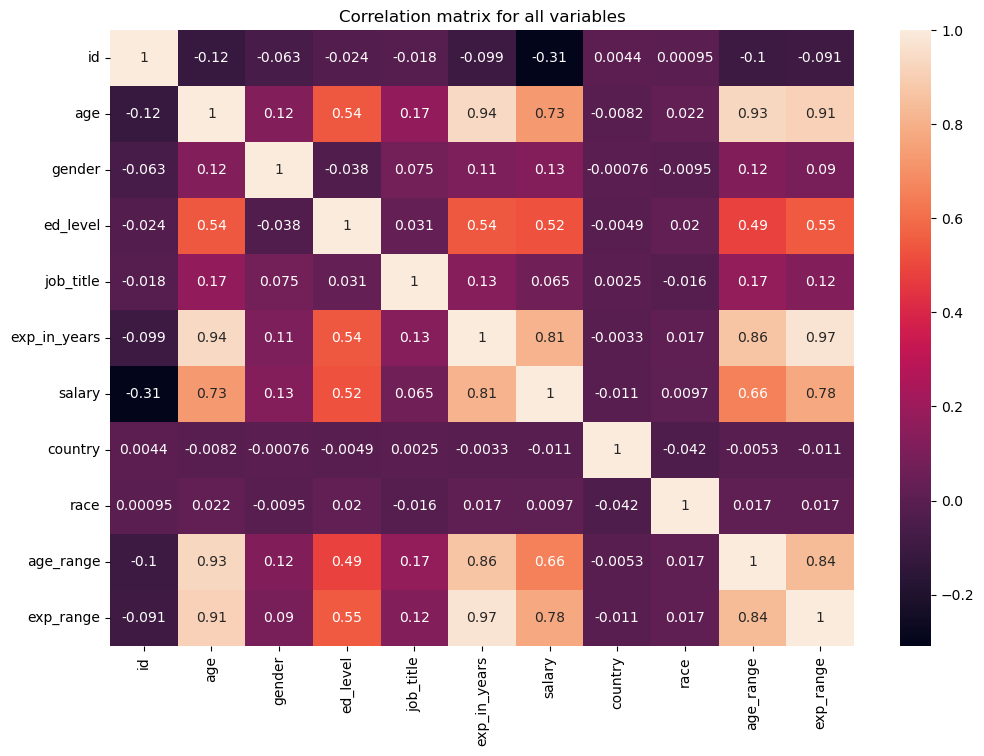

In [128]:
# Correlation matrix


matrix = encoded_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True)

plt.title("Correlation matrix for all variables")
plt.show


In [237]:
# Listing the strongest correlations with salary
encoded_df.corr()["salary"].abs().sort_values(ascending=False)

salary          1.000000
exp_in_years    0.809043
exp_range       0.779692
age             0.728162
age_range       0.656714
ed_level        0.524967
id              0.309320
gender          0.127360
job_title       0.064616
country         0.010708
race            0.009715
Name: salary, dtype: float64

In [213]:
# Age, ed and experience have the strongest correlation with salaries
#Gender, Country and race have very week correlation.

## Exploring the effects of age, experience and ed_levels on Salary

/var/folders/fz/f6hf5d2d0jv4kcc5bdw5rvkh0000gn/T/ipykernel_52433/2223343338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "ed_level", y = "salary", data = df, palette = "coolwarm",


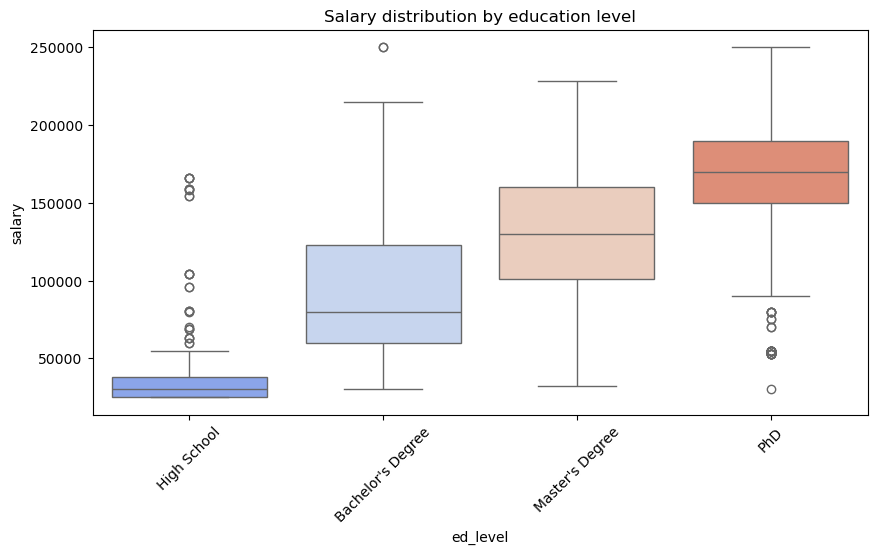

In [191]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = "ed_level", y = "salary", data = df, palette = "coolwarm",
           order = ["High School","Bachelor's Degree", "Master's Degree", "PhD"] )
plt.title("Salary distribution by education level")
plt.xticks(rotation = 45)

plt.show()

/var/folders/fz/f6hf5d2d0jv4kcc5bdw5rvkh0000gn/T/ipykernel_52433/3762338854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "age_range", y = "salary", data = df, palette = "coolwarm")


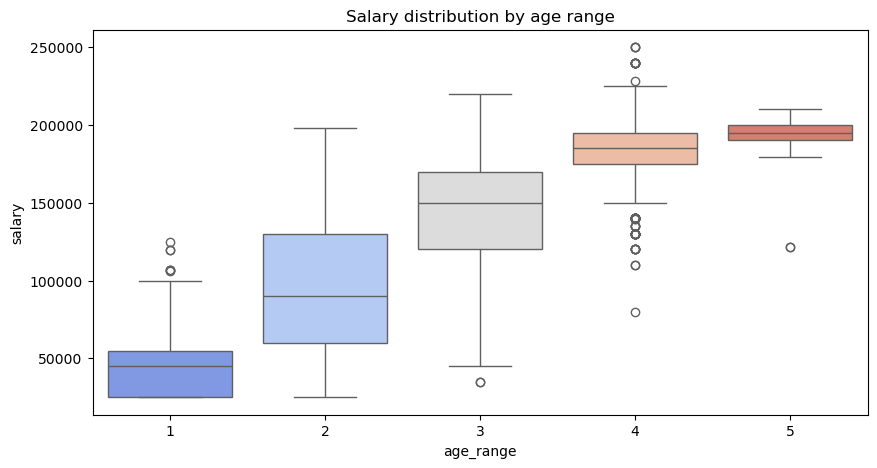

In [193]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = "age_range", y = "salary", data = df, palette = "coolwarm")
plt.title("Salary distribution by age range")


plt.show()

/var/folders/fz/f6hf5d2d0jv4kcc5bdw5rvkh0000gn/T/ipykernel_52433/2543363463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "exp_range", y = "salary", data = df, palette = "coolwarm")


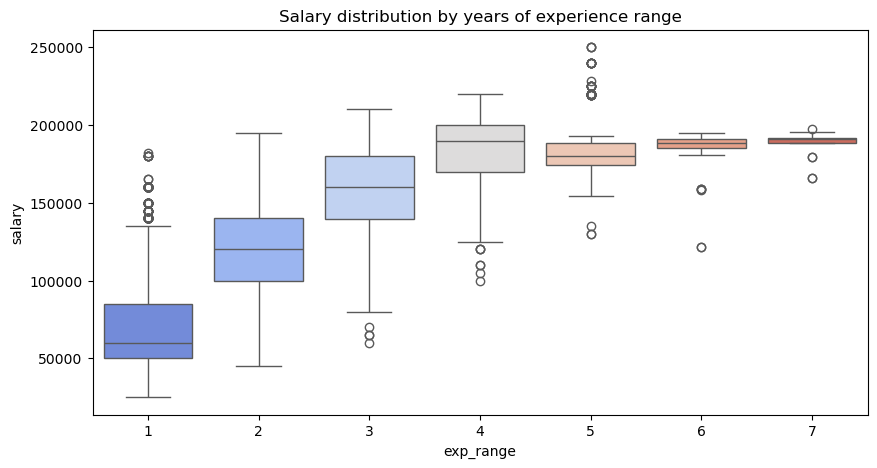

In [161]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = "exp_range", y = "salary", data = df, palette = "coolwarm")
plt.title("Salary distribution by years of experience range")


plt.show()

In [ ]:
### Scatterplots for age and exp

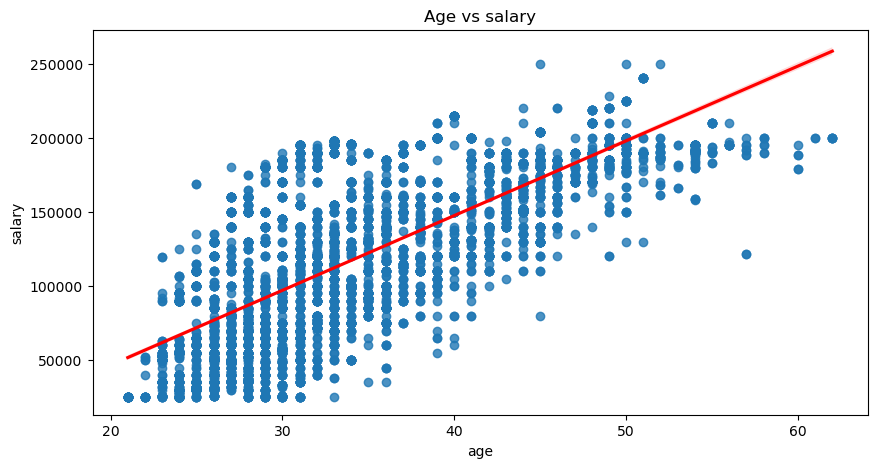

In [177]:

plt.figure(figsize=(10, 5))


sns.regplot(x="age", y="salary", data = df, line_kws={"color":"red"})

plt.title("Age vs salary")

plt.show()

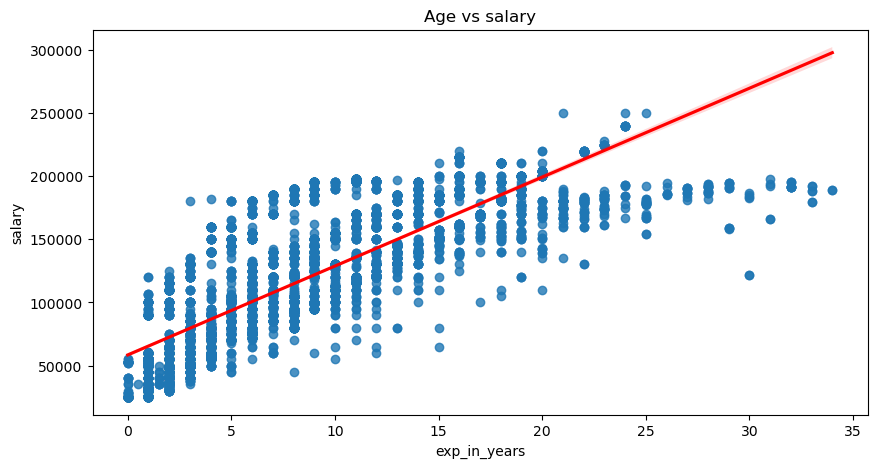

In [179]:
plt.figure(figsize=(10, 5))


sns.regplot(x="exp_in_years", y="salary", data = df, line_kws={"color":"red"})

plt.title("Age vs salary")

plt.show()

## Using statsmodel

In [268]:
X=encoded_df[["age_range","exp_range","ed_level"]]
y= encoded_df["salary"]

In [278]:
X= sm.add_constant(X)
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     3668.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:27:55   Log-Likelihood:                -79026.
No. Observations:                6694   AIC:                         1.581e+05
Df Residuals:                    6690   BIC:                         1.581e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.302e+04   1420.757     30.280      0.000    4.02e+04    4.58e+04
age_range    134.2575    922.440      0.146      0.884   -1674.019    1942.534
exp_range     3.1e+04    632.951     48.980      0.000    2.98e+04    3.22e+04
ed_level    6089.4199    388.526     15.673      0.000    5327.785    6851.055
==============================================================================
Omnibus:                      281.748   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.534
Skew:                           0.510   Prob(JB):                     4.11e-70
Kurtosis:                       3.327   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Age and experience are also strongly correlated

In [259]:
encoded_df[["age","exp_in_years","ed_level","salary"]].corr()

,age,exp_in_years,ed_level,salary
age,1.000000,0.937717,0.540836,0.728162
exp_in_years,0.937717,1.000000,0.543031,0.809043
ed_level,0.540836,0.543031,1.000000,0.524967
salary,0.728162,0.809043,0.524967,1.000000


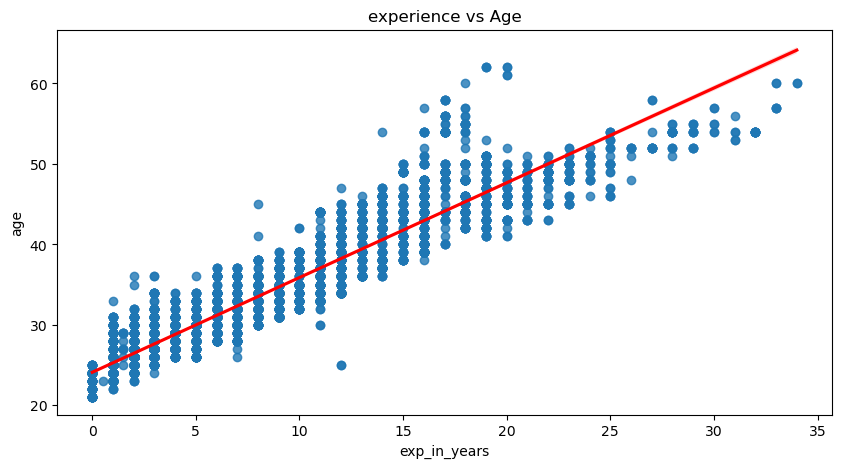

In [183]:

plt.figure(figsize=(10, 5))


sns.regplot(x="exp_in_years", y="age", data = df, line_kws={"color":"red"})

plt.title("experience vs Age")

plt.show()

### Checking VIF

In [287]:
X=encoded_df[["age_range","exp_range","ed_level"]]

VIF = pd.DataFrame()
VIF["independants"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

VIF

,independants,VIF
0,age_range,11.070259
1,exp_range,12.378817
2,ed_level,2.895190
